In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import cv2
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import tensorflow as tf

In [2]:
import os
print(os.listdir('D:/NTI Artificial Intelligence/day 12/flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [3]:
FLOWER_DAISY_DIR='D:/NTI Artificial Intelligence/day 12/flowers/daisy'
FLOWER_SUNFLOWER_DIR='D:/NTI Artificial Intelligence/day 12/flowers/sunflower'
FLOWER_TULIP_DIR='D:/NTI Artificial Intelligence/day 12/flowers/tulip'
FLOWER_DANDI_DIR='D:/NTI Artificial Intelligence/day 12/flowers/dandelion'
FLOWER_ROSE_DIR='D:/NTI Artificial Intelligence/day 12/flowers/rose'

In [4]:
os.listdir(FLOWER_DAISY_DIR)

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '10300722094_28fa978807_n.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0c

In [5]:
type(os.listdir(FLOWER_DAISY_DIR))

list

In [6]:
os.listdir(FLOWER_DAISY_DIR)[0]

'100080576_f52e8ee070_n.jpg'

In [7]:
type(os.listdir(FLOWER_DAISY_DIR)[0])

str

In [8]:
images=[]
labels=[]

In [9]:
def assign_label(img,flower_type):
    return flower_type

In [10]:
def make_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR) #read the colored image but any transperancy will be removed
        img = cv2.resize(img, (150,150))
        
        images.append(np.array(img))
        labels.append(str(label))

### Calling the function for preparing data

In [11]:
make_data('Daisy',FLOWER_DAISY_DIR)
print(len(images))

100%|███████████████████████████████████████████████████████████████████████████████| 764/764 [00:03<00:00, 223.88it/s]

764


In [12]:
make_data('Dandelion',FLOWER_DANDI_DIR)
print(len(images))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:04<00:00, 214.25it/s]

1816


In [13]:
make_data('Rose',FLOWER_ROSE_DIR)
print(len(images))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:04<00:00, 158.70it/s]

2600


In [14]:
make_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(images))

100%|███████████████████████████████████████████████████████████████████████████████| 733/733 [00:03<00:00, 191.57it/s]

3333


In [15]:
make_data('Tulip',FLOWER_TULIP_DIR)
print(len(images))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:04<00:00, 230.74it/s]

4317


In [16]:
print(len(labels))

4317


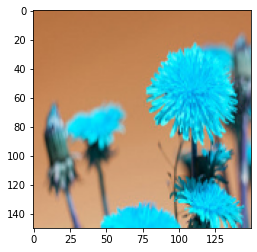

In [17]:
plt.imshow(images[1000])

In [18]:
labels[1000]

'Dandelion'

###### Encoding the labels to integers

In [19]:
le=LabelEncoder()
encoded_labels=le.fit_transform(labels)

In [20]:
encoded_labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [21]:
encoded_labels.shape

(4317,)

### Splitting into Training and Test Sets

In [22]:
images=np.array(images)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(images,encoded_labels,test_size=0.2,random_state=42)

In [24]:
x_train

array([[[[  8,  40,  24],
         [ 11,  41,  30],
         [ 13,  44,  28],
         ...,
         [  1,  30,  14],
         [  0,  31,  12],
         [  1,  34,  13]],

        [[  4,  35,  19],
         [  8,  38,  25],
         [ 13,  42,  26],
         ...,
         [  3,  33,  14],
         [  1,  33,  14],
         [  1,  33,  16]],

        [[  2,  33,  16],
         [  7,  36,  21],
         [ 11,  39,  20],
         ...,
         [  3,  33,  14],
         [  1,  33,  14],
         [  2,  34,  17]],

        ...,

        [[  2,  28,  14],
         [  3,  29,  15],
         [  3,  30,  15],
         ...,
         [  0,  17,   4],
         [  1,  17,   6],
         [  1,  18,   7]],

        [[  3,  30,  14],
         [  3,  29,  15],
         [  4,  30,  16],
         ...,
         [  0,  16,   3],
         [  0,  17,   4],
         [  1,  18,   7]],

        [[  3,  31,  12],
         [  4,  30,  16],
         [  4,  30,  17],
         ...,
         [  0,  16,   2],
        

In [25]:
type(x_train)

numpy.ndarray

In [26]:
x_train.shape

(3453, 150, 150, 3)

In [27]:
type(y_train)

numpy.ndarray

# Building the convolutional neural network

In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(filters=52, kernel_size=5, input_shape=(150,150,3),activation='relu'))

In [30]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(units=512, activation='relu'))

In [33]:
model.add(Dense(units=5)) # 5 categories

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 52)      3952      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 52)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 277108)            0         
                                                                 
 dense (Dense)               (None, 512)               141879808 
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 141,886,325
Trainable params: 141,886,325
Non-trainable params: 0
__________________________________________

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2 )

Epoch 1/10
 2/44 [>.............................] - ETA: 2:56 - loss: 6315.0493 - accuracy: 0.2031

In [ ]:
len(x_train)

In [ ]:
len(y_train)

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy accuracy')
plt.legend()